# Комп’ютерний практикум 8. Класифікація рукописних чисел повнозв’язною мережею мережею. Методи оптимізації.

In [ ]:
import torch
import random
import numpy as np
import torchvision.datasets

import matplotlib.pyplot as plt

In [ ]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels

X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

In [ ]:
print(X_train.dtype, y_train.dtype)

In [ ]:
X_train = X_train.float()
X_test = X_test.float()

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

In [ ]:
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [ ]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

In [ ]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x

    
mnist_net = MNISTNet(100)

In [ ]:
!nvidia-smi
print(torch.cuda.is_available())

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)

# list(mnist_net.parameters())

In [ ]:
X_test = X_test.to(device)
y_test = y_test.to(device)

In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []
validation_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(50):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = mnist_net.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()
    
    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    validation_loss_history.append(loss_value)
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(epoch, accuracy)

In [ ]:
plt.plot(test_accuracy_history)

__Завдання.__ Зробіть покращення у нейронній мережі та дайте відповідь на наступні питання:

1) Побудуйте на одному графіку loss для train і validation. Чи правда, що loss на train і validation падає однаково швидко і виходить на однакове значення, або ж у нас є перенавчання?

In [ ]:
plt.plot(test_loss_history, color='g')
plt.plot(validation_loss_history, color='b')

2) Чи веде збільшення кількості епох (40 епох -> 200 епох) до поліпшення метрик на валідації?

In [ ]:
# TODO: check on GPU

3) Чи уповільнює torch.backends.cudnn.deterministic = True навчання на практиці? Якщо так, то наскільки?

In [ ]:
# TODO: check on GPU

4) Спробуйте різні методи градієнтного спуску. Як вибір градієнтного спуску впливає на accuracy? Для впевненості краще проводити один експеримент 3-5 разів на різних random seed: так ви зрозумієте, чи дійсно позначається вплив методу або справа в випадковості.

In [ ]:
# TODO: check on GPU

5) Реалізуйте функціональність torch.nn.Linear з нуля і звірте з оригіналом!

In [ ]:
class linL():
    def __init__(self, n_inp, n_out, bias=True):
        self.n_inp = n_inp 
        self.n_out = n_out 
        self.bias = np.ones((self.n_out)) if bias else None 
        
        self.W = np.ones((self.n_inp, self.n_out))
        
    def forward(self, X):
        if self.bias is not None:
            self.Y = X.dot(self.W) + self.bias
        else:
            self.Y = X.dot(self.W)
        return self.Y
    

lin_obj = linL(100, 50)

X = np.ones((100))
Y = lin_obj.forward(X)

print(Y.shape)

6) Знайдіть оптимальну кількість епох для навчання, аналізуючи графіки втрат.

In [ ]:
# TODO: check on GPU

7) Нехай у нас буде 1 об'єкт x на вході з двома компонентами. Його ми передамо в повнозв'язний шар з 3-ма нейронами і отримаємо, відповідно, 3 виходи. Після цього напишіть цю ж функціональність за допомогою матричного множення. Та перевірте розрахунок похідної.

In [ ]:
x = torch.tensor([[10., 20.]])

In [ ]:
fc = torch.nn.Linear(2, 3)

In [ ]:
w = torch.tensor(
    [[11., 12.], 
     [21., 22.], 
     [31., 32]]
)
fc.weight.data = w

In [ ]:
b = torch.tensor(
    [[31., 32., 33.]]
)
fc.bias.data = b

In [ ]:
fc_out = fc(x)
fc_out

In [ ]:
fc_out_summed = fc_out.sum()
fc_out_summed

In [ ]:
fc_out_summed.backward()
weight_grad = fc.weight.grad
weight_grad

In [ ]:
bias_grad = fc.bias.grad
bias_grad

Тепер зробимо розрахунки які були вище але без fc-шару.<br>Зазначимо, що у "w" та "b" необхідно розраховувати градієнти (для fc-шара це виходить автоматично):

In [ ]:
w.requires_grad_(True)

In [ ]:
b.requires_grad_(True)

In [ ]:
# Спробуйте отримати аналогічні результати використовуючи матричне множення
fc_out_alternative = torch.matmul(x, w.T) + b   # x * w^T + b
fc_out_alternative

In [ ]:
# Отримаємо вихід після сумування нашої формули:
our_formula = torch.sum(fc_out_alternative) # SUM{x * w^T + b}
our_formula

In [ ]:
# Зробіть backward для нашої формули:
our_formula.backward()

In [ ]:
print(fc_out == fc_out_alternative)

print('fc_weight_grad:', weight_grad)
print('our_weight_grad:', w.grad)

print('fc_bias_grad:', bias_grad)
print('out_bias_grad:', b.grad)

## 8) Зробіть аналогічні розрахунки та натренеруйте модель для датасету CIFAR 10. Напишіть звіт, де вкажіть, що це за датасет, особливості, кількість класів, модель, результат, тощо.

In [1]:
import torch
import random
import numpy as np
import torchvision.datasets

import matplotlib.pyplot as plt

In [2]:
CIFAR10_train = torchvision.datasets.CIFAR10('./', download=True, train=True)
CIFAR10_test = torchvision.datasets.CIFAR10('./', download=True, train=False)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
X_train = torch.from_numpy(CIFAR10_train.data)
y_train = torch.from_numpy(np.array(CIFAR10_train.targets))

X_test = torch.from_numpy(CIFAR10_test.data)
y_test = torch.from_numpy(np.array(CIFAR10_test.targets))

print('|', type(X_train), X_train.shape, '|', type(y_train), y_train.shape, '|')
print('|', type(X_test), X_test.shape, '|', type(y_test), y_test.shape, '|')

| <class 'torch.Tensor'> torch.Size([50000, 32, 32, 3]) | <class 'torch.Tensor'> torch.Size([50000]) |
| <class 'torch.Tensor'> torch.Size([10000, 32, 32, 3]) | <class 'torch.Tensor'> torch.Size([10000]) |


In [4]:
CIFAR10_train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

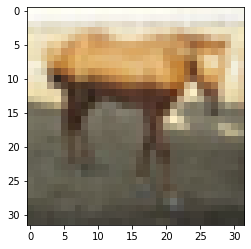

tensor(7)


In [5]:
plt.imshow(X_train[2000, :, :])
plt.show();

print(y_train[2000])

In [6]:
X_train = X_train.float()
X_test = X_test.float()

X_train /= 255.
X_test /= 255.

X_train = X_train.permute(0, 3, 1, 2)
X_test = X_test.permute(0, 3, 1, 2)

In [7]:
print(X_train.shape)
X_train = X_train.reshape([-1, 32*32*3])
X_test = X_test.reshape([-1, 32*32*3])
print(X_train.shape)

torch.Size([50000, 3, 32, 32])
torch.Size([50000, 3072])


In [8]:
!nvidia-smi
print(torch.cuda.is_available())

Sun Apr 12 14:48:52 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 440.64.00    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 106...  On   | 00000000:26:00.0 Off |                  N/A |
| 41%   37C    P5    11W / 120W |    434MiB /  6075MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [9]:
class CIFARNet(torch.nn.Module):
    def __init__(self):
        super(CIFARNet, self).__init__()
        self.fc1 = torch.nn.Linear(32*32*3, 2000)
        self.do1 = torch.nn.Dropout(0.4)
        self.bn1 = torch.nn.BatchNorm1d(2000)
        self.ac1 = torch.nn.ReLU()
        
        # self.fc2 = torch.nn.Linear(5000, 1000)
        # self.do2 = torch.nn.Dropout(0.4)
        # self.bn2 = torch.nn.BatchNorm1d(1000)
        # self.ac2 = torch.nn.ReLU()
        
        self.fc3 = torch.nn.Linear(2000, 100)
        self.do3 = torch.nn.Dropout(0.2)
        self.bn3 = torch.nn.BatchNorm1d(100)
        self.ac3 = torch.nn.ReLU()
        
        self.fc4 = torch.nn.Linear(100, 10)        
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.do1(x)
        x = self.bn1(x)
        x = self.ac1(x)
        
        # x = self.fc2(x)
        # x = self.do2(x)
        # x = self.bn2(x)
        # x = self.ac2(x)
        
        x = self.fc3(x)
        x = self.do3(x)
        x = self.bn3(x)
        x = self.ac3(x)
        
        x = self.fc4(x)
        return x

    
cifar_net = CIFARNet()

In [10]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cifar_net.parameters(), lr=1.0e-3)

In [11]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cifar_net = cifar_net.to(device)

In [12]:
X_test = X_test.to(device)
y_test = y_test.to(device)

In [14]:
batch_size = 2

test_accuracy_history = []
test_loss_history = []
validation_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(100):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = cifar_net.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()
    
    test_preds = cifar_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    validation_loss_history.append(loss_value)
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(epoch, accuracy)

0 tensor(0.1869, device='cuda:0')
1 tensor(0.1838, device='cuda:0')
2 tensor(0.1939, device='cuda:0')
3 tensor(0.1905, device='cuda:0')
4 tensor(0.1852, device='cuda:0')
5 tensor(0.1845, device='cuda:0')
6 tensor(0.1782, device='cuda:0')
7 tensor(0.1711, device='cuda:0')
8 tensor(0.1733, device='cuda:0')
9 tensor(0.1750, device='cuda:0')
10 tensor(0.1767, device='cuda:0')
11 tensor(0.1755, device='cuda:0')
12 tensor(0.1882, device='cuda:0')
13 tensor(0.1724, device='cuda:0')
14 tensor(0.1819, device='cuda:0')
15 tensor(0.1696, device='cuda:0')
16 tensor(0.1686, device='cuda:0')


RuntimeError: CUDA out of memory. Tried to allocate 78.00 MiB (GPU 0; 5.93 GiB total capacity; 4.72 GiB already allocated; 36.75 MiB free; 4.85 GiB reserved in total by PyTorch)